In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
df = pd.read_excel("HR Datasheet.xls")

In [162]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [163]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [165]:
df= df.drop(['EmployeeCount','StandardHours','BusinessTravel','DailyRate','EducationField','EmployeeNumber','HourlyRate','JobRole','MonthlyRate', 'Over18','StockOptionLevel' ], axis=1)
#,'Age', 'Gender', 'EnvironmentSatisfaction', 'Department', 'MaritalStatus', 'WorkLifeBalance', 'MonthlyIncome', 'RelationshipSatisfaction','PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole', 'YearsAtCompany', 'DistanceFromHome', 'JobInvolvement', 'JobLevel' 

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobSatisfaction           1470 non-null   int64 
 10  MaritalStatus             1470 non-null   object
 11  MonthlyIncome             1470 non-null   int64 
 12  NumCompaniesWorked        1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

In [167]:
df_vif = df.drop(['Attrition', 'Department', 'Gender','MaritalStatus','OverTime' ], axis=1)

<AxesSubplot:>

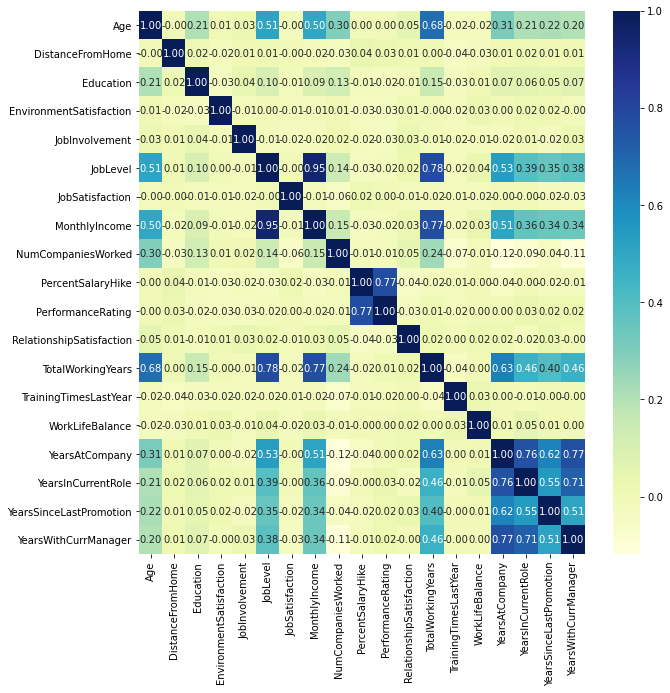

In [168]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fmt=".2f")

In [169]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df_vif
calc_vif(X)

,variables,VIF
0,Age,32.660275
1,DistanceFromHome,2.296647
2,Education,9.343970
3,EnvironmentSatisfaction,6.962787
4,JobInvolvement,14.576649
5,JobLevel,49.528737
6,JobSatisfaction,6.881842
7,MonthlyIncome,31.287063
8,NumCompaniesWorked,2.712146
9,PercentSalaryHike,41.367935


In [170]:
dummy =pd.get_dummies(df, drop_first=True)
dummy.head()
df1 = dummy.copy()

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   Education                          1470 non-null   int64
 3   EnvironmentSatisfaction            1470 non-null   int64
 4   JobInvolvement                     1470 non-null   int64
 5   JobLevel                           1470 non-null   int64
 6   JobSatisfaction                    1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   NumCompaniesWorked                 1470 non-null   int64
 9   PercentSalaryHike                  1470 non-null   int64
 10  PerformanceRating                  1470 non-null   int64
 11  RelationshipSatisfaction           1470 non-null   int64
 12  TotalWorkingYears   

In [172]:
X= df1.drop('Attrition_Yes', axis=1)
y= df1["Attrition_Yes"]

In [173]:
result = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1445
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -471.03
Date:                Sun, 31 Oct 2021   Deviance:                       942.06
Time:                        12:21:03   Pearson chi2:                 2.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age   

In [174]:
X = X.drop(['Age', 'JobLevel', 'MonthlyIncome', 'TrainingTimesLastYear', 'WorkLifeBalance', 'Department_Research & Development', 'Department_Sales', 'Education'],axis=1)

In [175]:
result = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1453
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -486.61
Date:                Sun, 31 Oct 2021   Deviance:                       973.22
Time:                        12:21:03   Pearson chi2:                 2.15e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DistanceFromHome        

In [176]:
X= X.drop(['PercentSalaryHike','MaritalStatus_Married'],axis=1)

In [177]:
result = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1455
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -489.68
Date:                Sun, 31 Oct 2021   Deviance:                       979.37
Time:                        12:21:03   Pearson chi2:                 2.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DistanceFromHome        

In [178]:
x_train, x_test, y_train, y_test = tts(X, y, train_size=0.7, random_state=1, stratify=y)

In [179]:
result = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Attrition_Yes   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1014
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -348.29
Date:                Sun, 31 Oct 2021   Deviance:                       696.58
Time:                        12:21:03   Pearson chi2:                 1.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DistanceFromHome        

In [180]:
yhat = result.predict(x_test)
prediction = list(map(round, yhat))


In [181]:

from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
from sklearn.metrics import classification_report
# confusion matrix

print(confusion_matrix(y_test , prediction))
#print(classification_report(y_test , prediction))
print(accuracy_score(y_test,prediction)*100) 


[[364   6]
 [ 51  20]]
87.07482993197279
